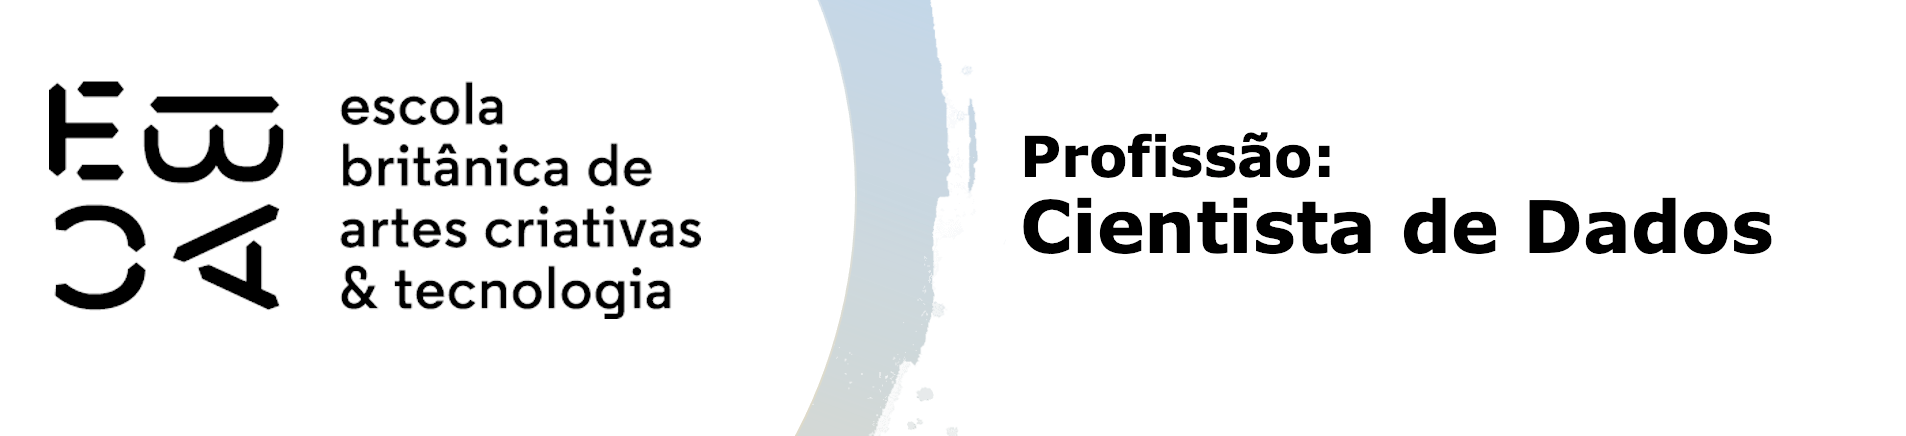

# Métodos hierárquicos de agrupamento - Tarefa

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import fcluster

import scipy.cluster.hierarchy as shc

In [2]:
penguins = pd.read_csv('penguins.csv')
penguins.index.name='id'
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
id,,,,,,,
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


## 1) Repetindo o que fizemos em aula

Primeiramente vamos repetir o que fizemos em aula com a base de pinguins.

1. Selecione as variáveis quantitativas da base de pinguins
2. Elimine valores faltantes
3. Padronize as variáveis para média zero e desvio padrão 1
4. Faça um agrupamento hierárquico dividindo essa base em 3 grupos
5. Faça o Dendrograma

In [3]:
# 1. e 2.
peng_num = penguins.select_dtypes(include='number').dropna()

In [4]:
# 3.
padronizador = StandardScaler()
peng_pad = padronizador.fit_transform(peng_num)

In [5]:
# 4.
clus = AgglomerativeClustering(linkage="complete", 
                               distance_threshold = None, 
                               n_clusters=3)

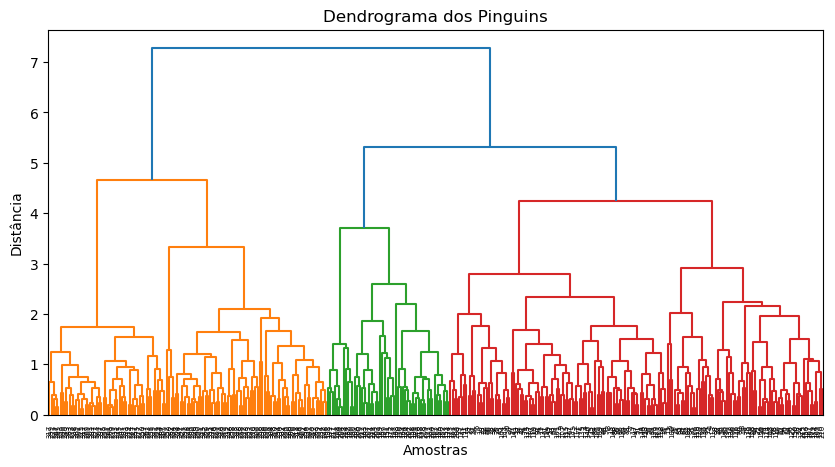

In [6]:
# 5.
Z = linkage(peng_pad, method='complete')

plt.figure(figsize=(10, 5))
dendrogram(Z)
plt.title("Dendrograma dos Pinguins")
plt.xlabel("Amostras")
plt.ylabel("Distância")
plt.show()

## 2) Avalie os grupos

Descreva os grupos:

- Quantos pinguins de cada espécie há em cada grupo?
- Descreva as variáveis quantitativas de cada grupo com as técnicas que você preferir.

In [11]:
colunas_numericas = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']
penguins_validos = penguins.dropna(subset=colunas_numericas).reset_index(drop=True)

scaler = StandardScaler()
peng_pad = scaler.fit_transform(penguins_validos[colunas_numericas])

Z = linkage(peng_pad, method='complete')

grupos = fcluster(Z, 3, criterion='maxclust')
penguins_validos['grupo'] = grupos

In [17]:
penguins_validos.groupby(['grupo', 'species']).size()

grupo  species  
1      Gentoo       123
2      Chinstrap     54
3      Adelie       151
       Chinstrap     14
dtype: int64

In [15]:
descricao = penguins_validos.groupby('grupo').describe()
print(descricao)

      bill_length_mm                                                        \
               count       mean       std   min   25%    50%     75%   max   
grupo                                                                        
1              123.0  47.504878  3.081857  40.9  45.3  47.30  49.550  59.6   
2               54.0  49.935185  2.659916  45.2  48.2  50.25  51.375  58.0   
3              165.0  39.283030  3.072471  32.1  37.0  39.10  41.100  47.6   

      bill_depth_mm             ... flipper_length_mm        body_mass_g  \
              count       mean  ...               75%    max       count   
grupo                           ...                                        
1             123.0  14.982114  ...             221.0  231.0       123.0   
2              54.0  18.568519  ...             201.0  212.0        54.0   
3             165.0  18.304242  ...             195.0  210.0       165.0   

                                                                         


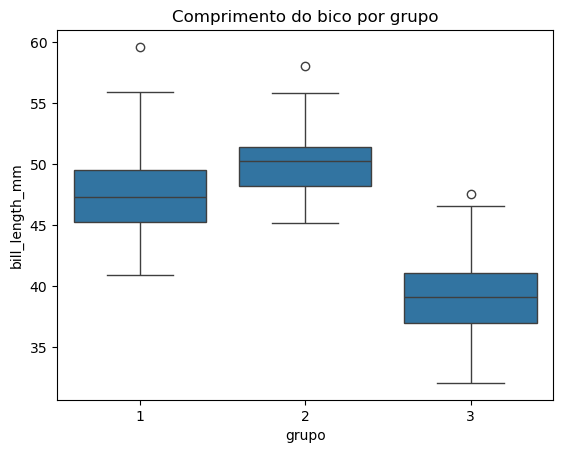

In [19]:
sns.boxplot(x='grupo', y='bill_length_mm', data=penguins_validos)
plt.title("Comprimento do bico por grupo")
plt.show()

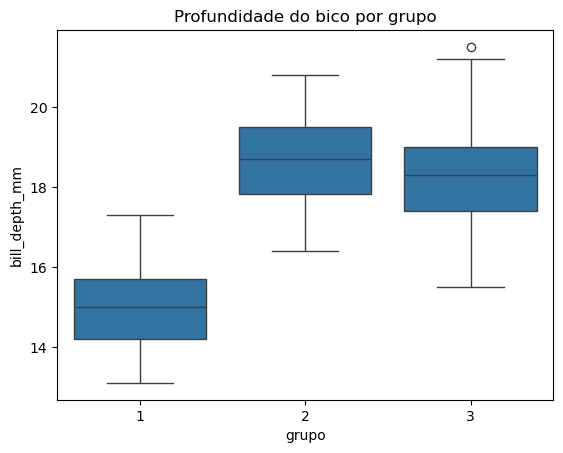

In [25]:
sns.boxplot(x='grupo', y='bill_depth_mm', data=penguins_validos)
plt.title("Profundidade do bico por grupo")
plt.show()

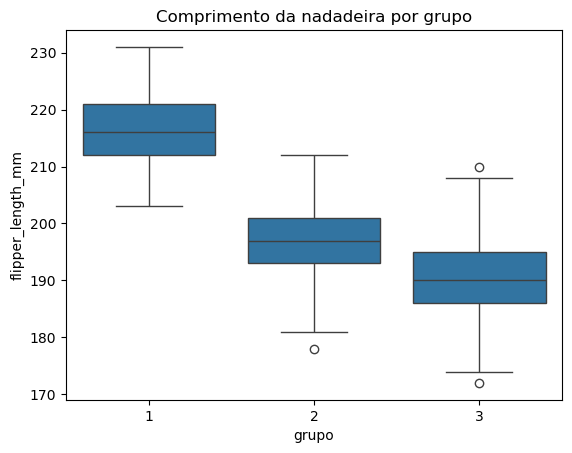

In [26]:
sns.boxplot(x='grupo', y='flipper_length_mm', data=penguins_validos)
plt.title("Comprimento da nadadeira por grupo")
plt.show()

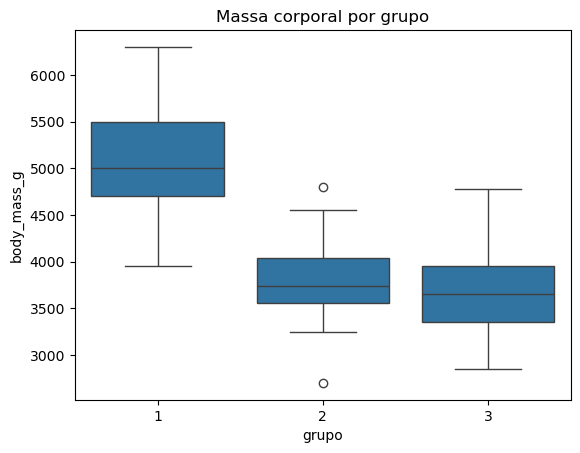

In [27]:
sns.boxplot(x='grupo', y='body_mass_g', data=penguins_validos)
plt.title("Massa corporal por grupo")
plt.show()

## 3) Alterando o agrupamento

O Dendrogarma sugere que podemem haver grupos interessantes se solicitarmos mais que 3 grupos. Se quisermos testar o agrupamento com mais de 3 grupos, quantos grupos o Dendrograma te sugere? (Dica: não faça mais que 6 grupos).

- Faça o agrupamento hierárquico semelhante ao anterior, mas com o número de grupos que você escolheu.
- Analise esses agrupamentos
    - Quantos pinguins de cada espécie há em cada grupo?
    - Quantos pinguins de cada espécie machos e fêmeas há em cada grupo?
- Na sua opinião, o agrupamento capturou algum padrão natural dos dados? Qual?